In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Código para desenhar função 2D - leia-o para saber o que está acontecendo, mas não precisa alterá-lo
def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

# Plote a rede neural rasa. Assumiremos que a entrada está no intervalo [0,10],[0,10] e a saída [-10,10]
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3):

  fig, ax = plt.subplots(3,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
  draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
  draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y)
  ax.set_title('Network output, $y$')
  ax.set_aspect(1.0)
  plt.show()

In [3]:
# Defina a função Rectified Linear Unit (ReLU)
def ReLU(preactivation):
  # TODO: utilize a implementação do notebook anterior
  activation = np.clip(preactivation, a_min=0, a_max=None)
  return activation

In [8]:
# Defina uma rede neural rasa com dois inputs, um output e três unidades ocultas
def shallow_2_1_3(x1, x2, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
  # TODO Substitua as linhas abaixo para calcular as três funções lineares iniciais
  # (figura 3.8a-c) a partir dos parâmetros theta. Estas são as preativações
    # para cada unidade oculta
    
    pre_1 = theta_10 + theta_11*x1 + theta_12*x2
    pre_2 = theta_20 + theta_21*x1 + theta_22*x2
    pre_3 = theta_30 + theta_31*x1 + theta_32*x2

  # Passe essas preativações pela função ReLU para calcular as ativações como na
  # figura 3.8 d-f
    act_1 = ReLU(pre_1)
    act_2 = ReLU(pre_2)
    act_3 = ReLU(pre_3)

  # TODO Substitua o código abaixo para ponderar as ativações usando phi1, phi2 e phi3
  # Para criar o equivalente à figura 3.8 g-i
  
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

  # TODO Substitua o código abaixo para combinar as ativações ponderadas e adicionar
  # phi_0 para criar a saída como na figura 3.8j
    y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Retorna tudo o que calculamos
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

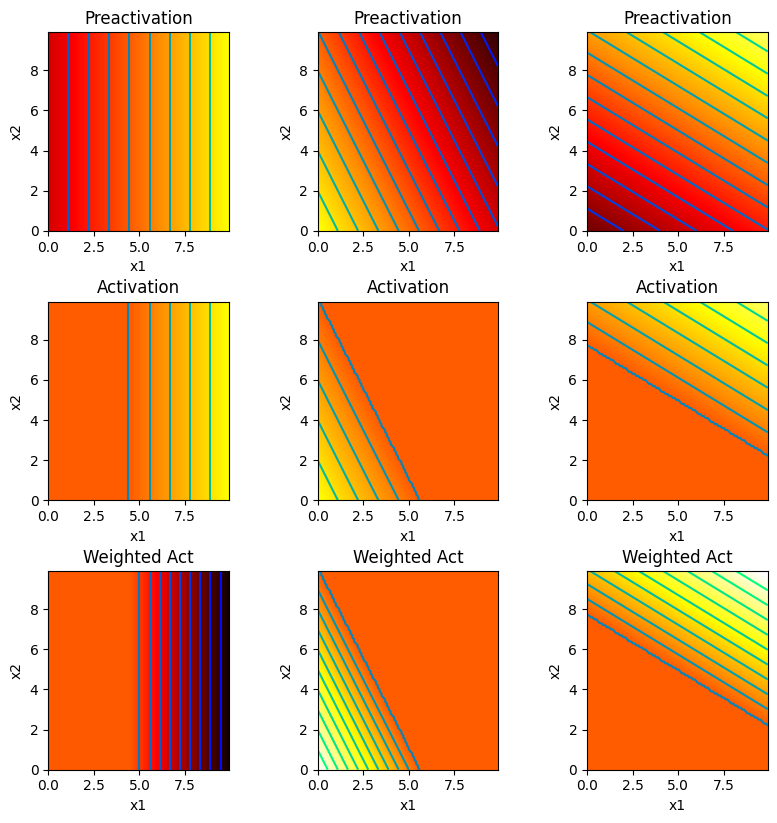

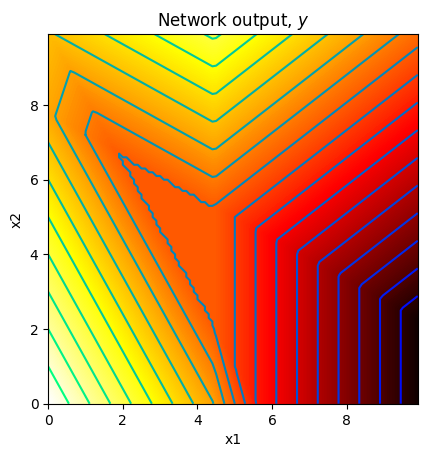

In [9]:
# Agora vamos definir alguns parâmetros e rodar a rede neural
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -2.0; phi_2 = 2.0; phi_3 = 1.5

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1, x2 = np.meshgrid(x1, x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# Rodamos a rede neural para cada um desses valores de input
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1, x2, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# E então plotamos
plot_neural_2_inputs(x1, x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)

Agora vamos estender este modelo para ter dois outputs $y_1$ e $y_2$, cada um dos quais pode ser visualizado com um mapa de calor separado. Agora você terá conjuntos de parâmetros $\phi_{10}, \phi_{11}, \phi_{12}, \phi_{13}$ e $\phi_{20}, \phi_{21}, \phi_{22}, \phi_{23}$ que correspondem a cada um desses outputs.

In [10]:
# Plotar a rede neural rasa. Vamos assumir que a entrada está no intervalo [0,10],[0,10] e a saída [-10,10]
def plot_neural_2_inputs_2_outputs(x1, x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23):

  # Plotar plots intermediários se a flag estiver definida
  fig, ax = plt.subplots(4,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1, x2, pre_1); ax[0,0].set_title('Pré-ativação')
  draw_2D_function(ax[0,1], x1, x2, pre_2); ax[0,1].set_title('Pré-ativação')
  draw_2D_function(ax[0,2], x1, x2, pre_3); ax[0,2].set_title('Pré-ativação')
  draw_2D_function(ax[1,0], x1, x2, act_1); ax[1,0].set_title('Ativação')
  draw_2D_function(ax[1,1], x1, x2, act_2); ax[1,1].set_title('Ativação')
  draw_2D_function(ax[1,2], x1, x2, act_3); ax[1,2].set_title('Ativação')
  draw_2D_function(ax[2,0], x1, x2, w_act_11); ax[2,0].set_title('Ativação Ponderada 1')
  draw_2D_function(ax[2,1], x1, x2, w_act_12); ax[2,1].set_title('Ativação Ponderada 1')
  draw_2D_function(ax[2,2], x1, x2, w_act_13); ax[2,2].set_title('Ativação Ponderada 1')
  draw_2D_function(ax[3,0], x1, x2, w_act_21); ax[3,0].set_title('Ativação Ponderada 2')
  draw_2D_function(ax[3,1], x1, x2, w_act_22); ax[3,1].set_title('Ativação Ponderada 2')
  draw_2D_function(ax[3,2], x1, x2, w_act_23); ax[3,2].set_title('Ativação Ponderada 2')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax, x1, x2, y1)
  ax.set_title('Saída da Rede, $y_1$')
  ax.set_aspect(1.0)
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax, x1, x2, y2)
  ax.set_title('Saída da Rede, $y_2$')
  ax.set_aspect(1.0)
  plt.show()

In [18]:
# Definir uma rede neural rasa com dois inputs, dois outputs e três unidades ocultas
def shallow_2_2_3(x1, x2, ReLU, phi_10, phi_11, phi_12, phi_13, phi_20, phi_21, phi_22, phi_23, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):

  # TODO -- escreva esta função -- substitua o código falso abaixo

  pre_1 = theta_10 + theta_11*x1 + theta_12*x2
  pre_2 = theta_20 + theta_21*x1 + theta_22*x2
  pre_3 = theta_30 + theta_31*x1 + theta_32*x2

  act_1 = ReLU(pre_1)
  act_2 = ReLU(pre_2)
  act_3 = ReLU(pre_3)

  w_act_11 = phi_11 * act_1
  w_act_12 = phi_12 * act_2
  w_act_13 = phi_13 * act_3
  
  w_act_21 = phi_21 * act_1
  w_act_22 = phi_22 * act_2
  w_act_23 = phi_23 * act_3

  y1 = phi_10 + w_act_11 + w_act_12 + w_act_13
  y2 = phi_20 + w_act_21 + w_act_22 + w_act_23

  # Retornar tudo o que calculamos
  return y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23

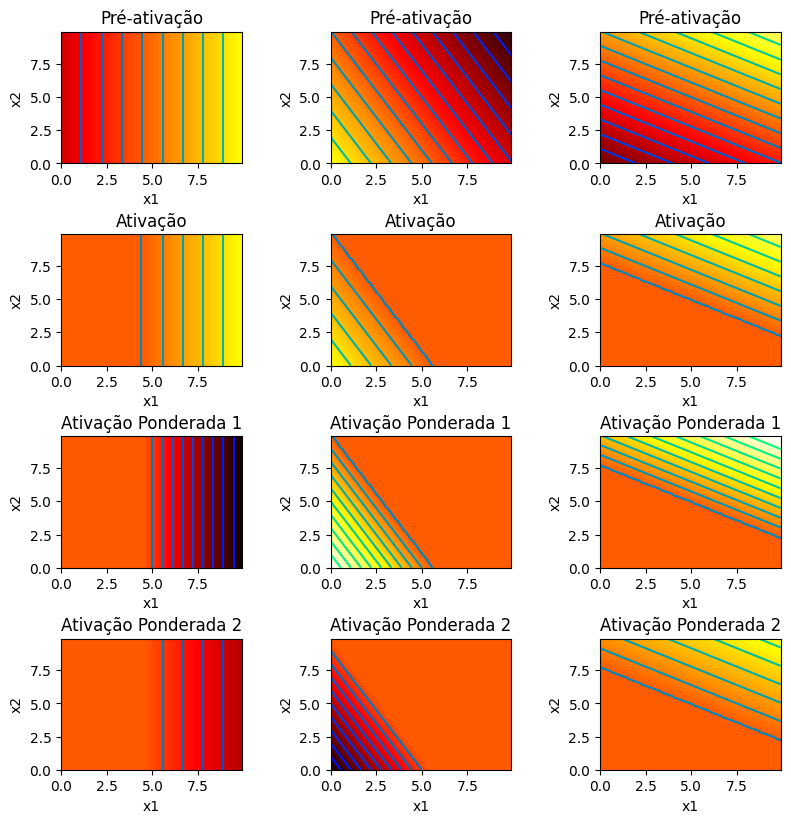

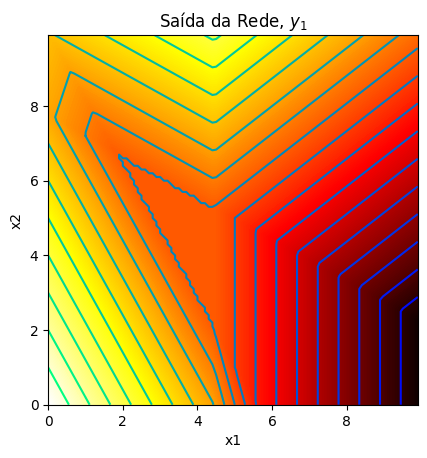

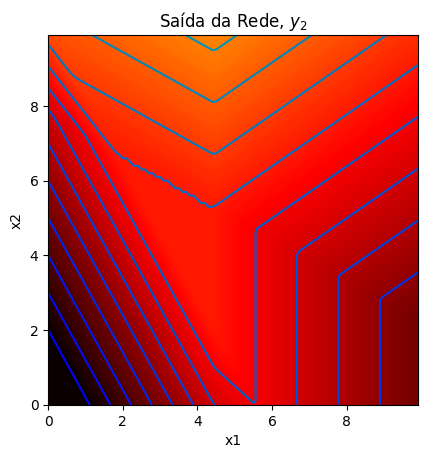

In [19]:
# Agora vamos definir alguns parâmetros e executar a rede neural
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_10 = 0.0; phi_11 = -2.0; phi_12 = 2.0; phi_13 = 1.5
phi_20 = -2.0; phi_21 = -1.0; phi_22 = -2.0; phi_23 = 0.8

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1, x2 = np.meshgrid(x1, x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# Executamos a rede neural para cada um desses valores de entrada
y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23 = \
    shallow_2_2_3(x1, x2, ReLU, phi_10, phi_11, phi_12, phi_13, phi_20, phi_21, phi_22, phi_23, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# E então plotamos
plot_neural_2_inputs_2_outputs(x1, x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23)